# PCA

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , adjusted_rand_score,normalized_mutual_info_score,davies_bouldin_score

## Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.duplicated().sum()

0

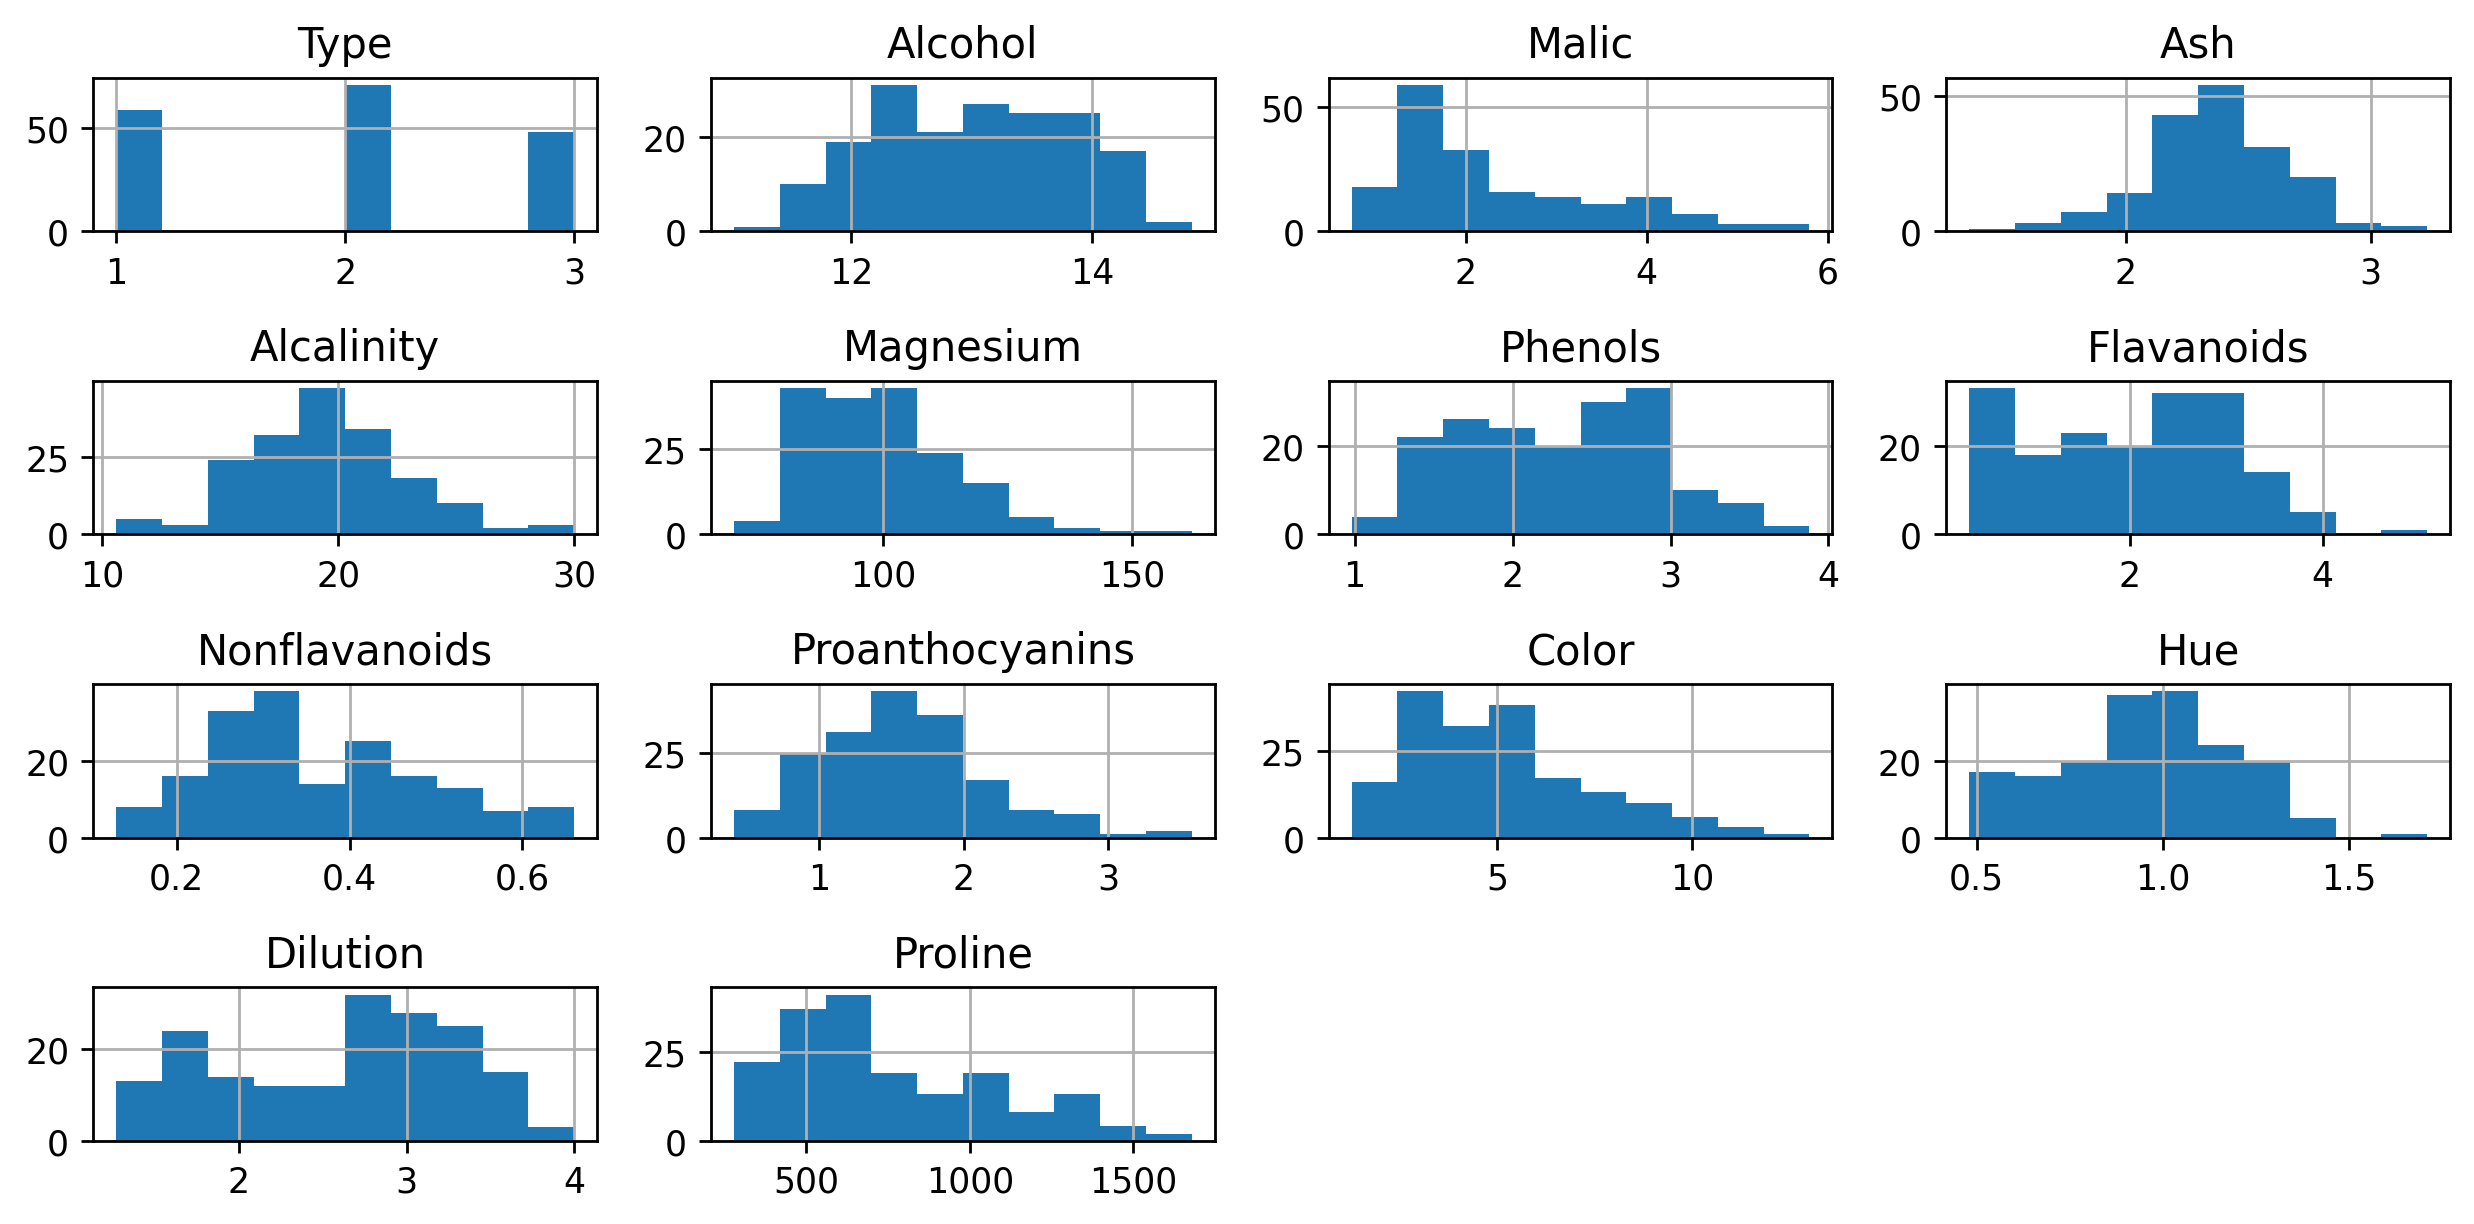

In [7]:
df.hist()
plt.tight_layout()

In [8]:
df.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

<Axes: >

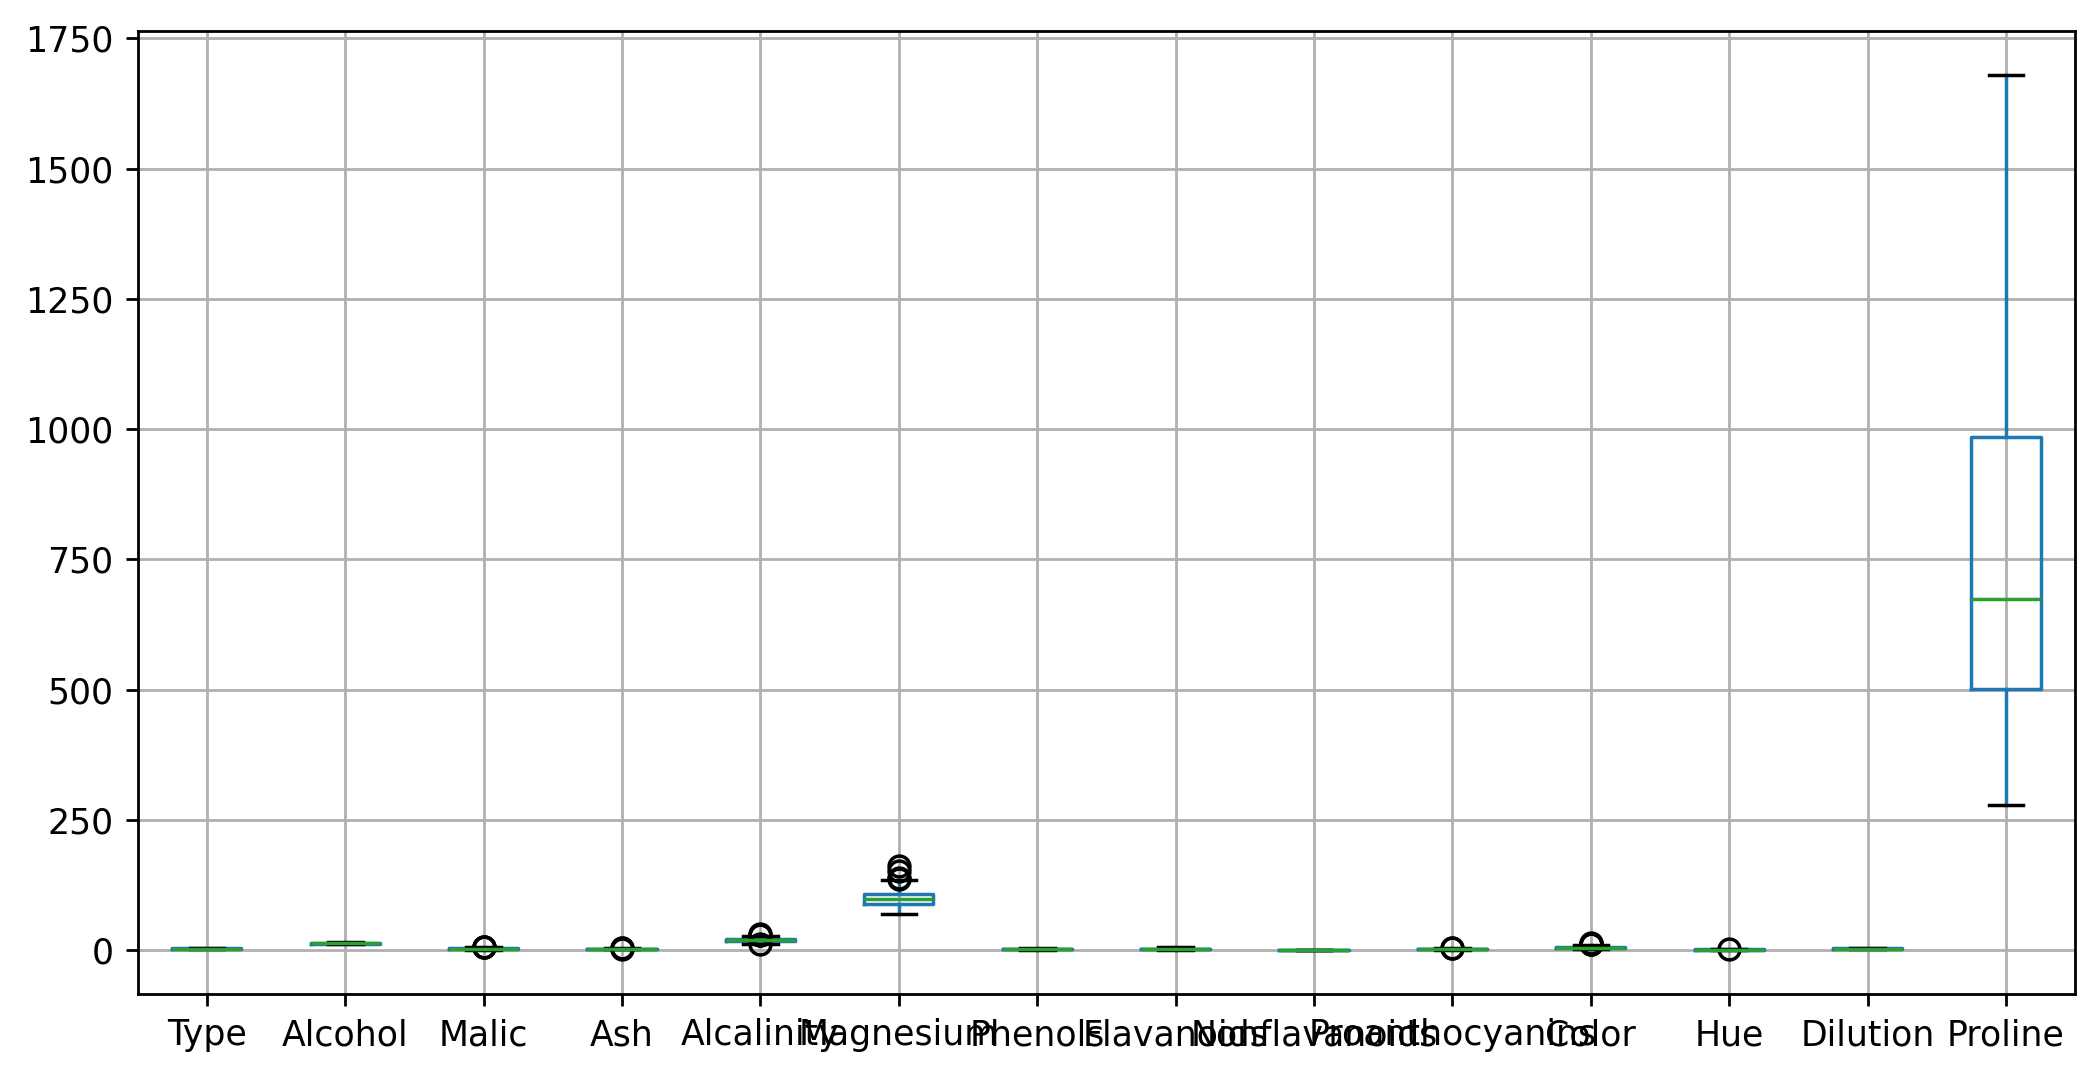

In [9]:
df.boxplot()

In [10]:
def capping(data,col):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        data[col]=np.where(upper < data[col],upper,np.where(lower > data[col],lower,data[col]))

In [11]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [12]:
capping(df,df.columns)

In [13]:
df.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


<Axes: >

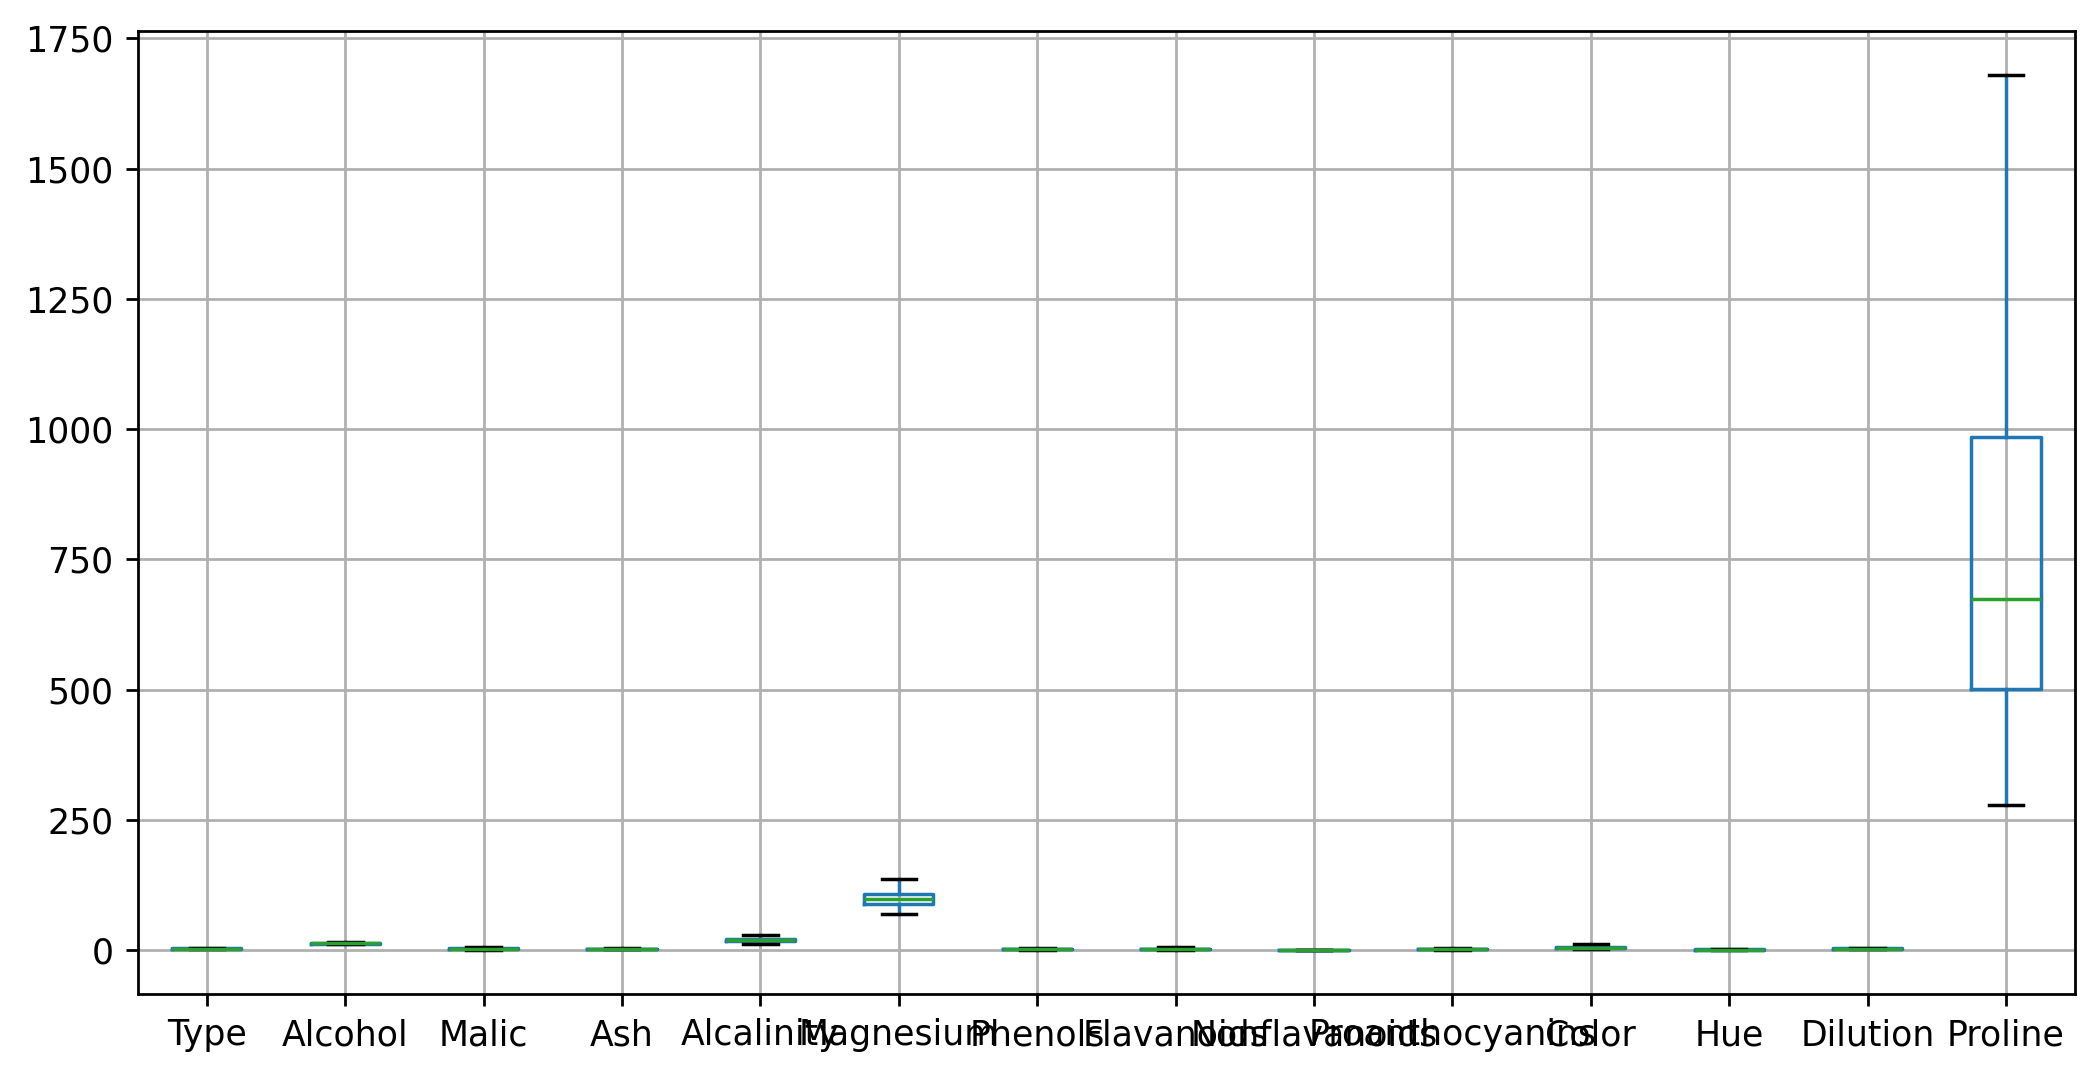

In [14]:
df.boxplot()

<Axes: >

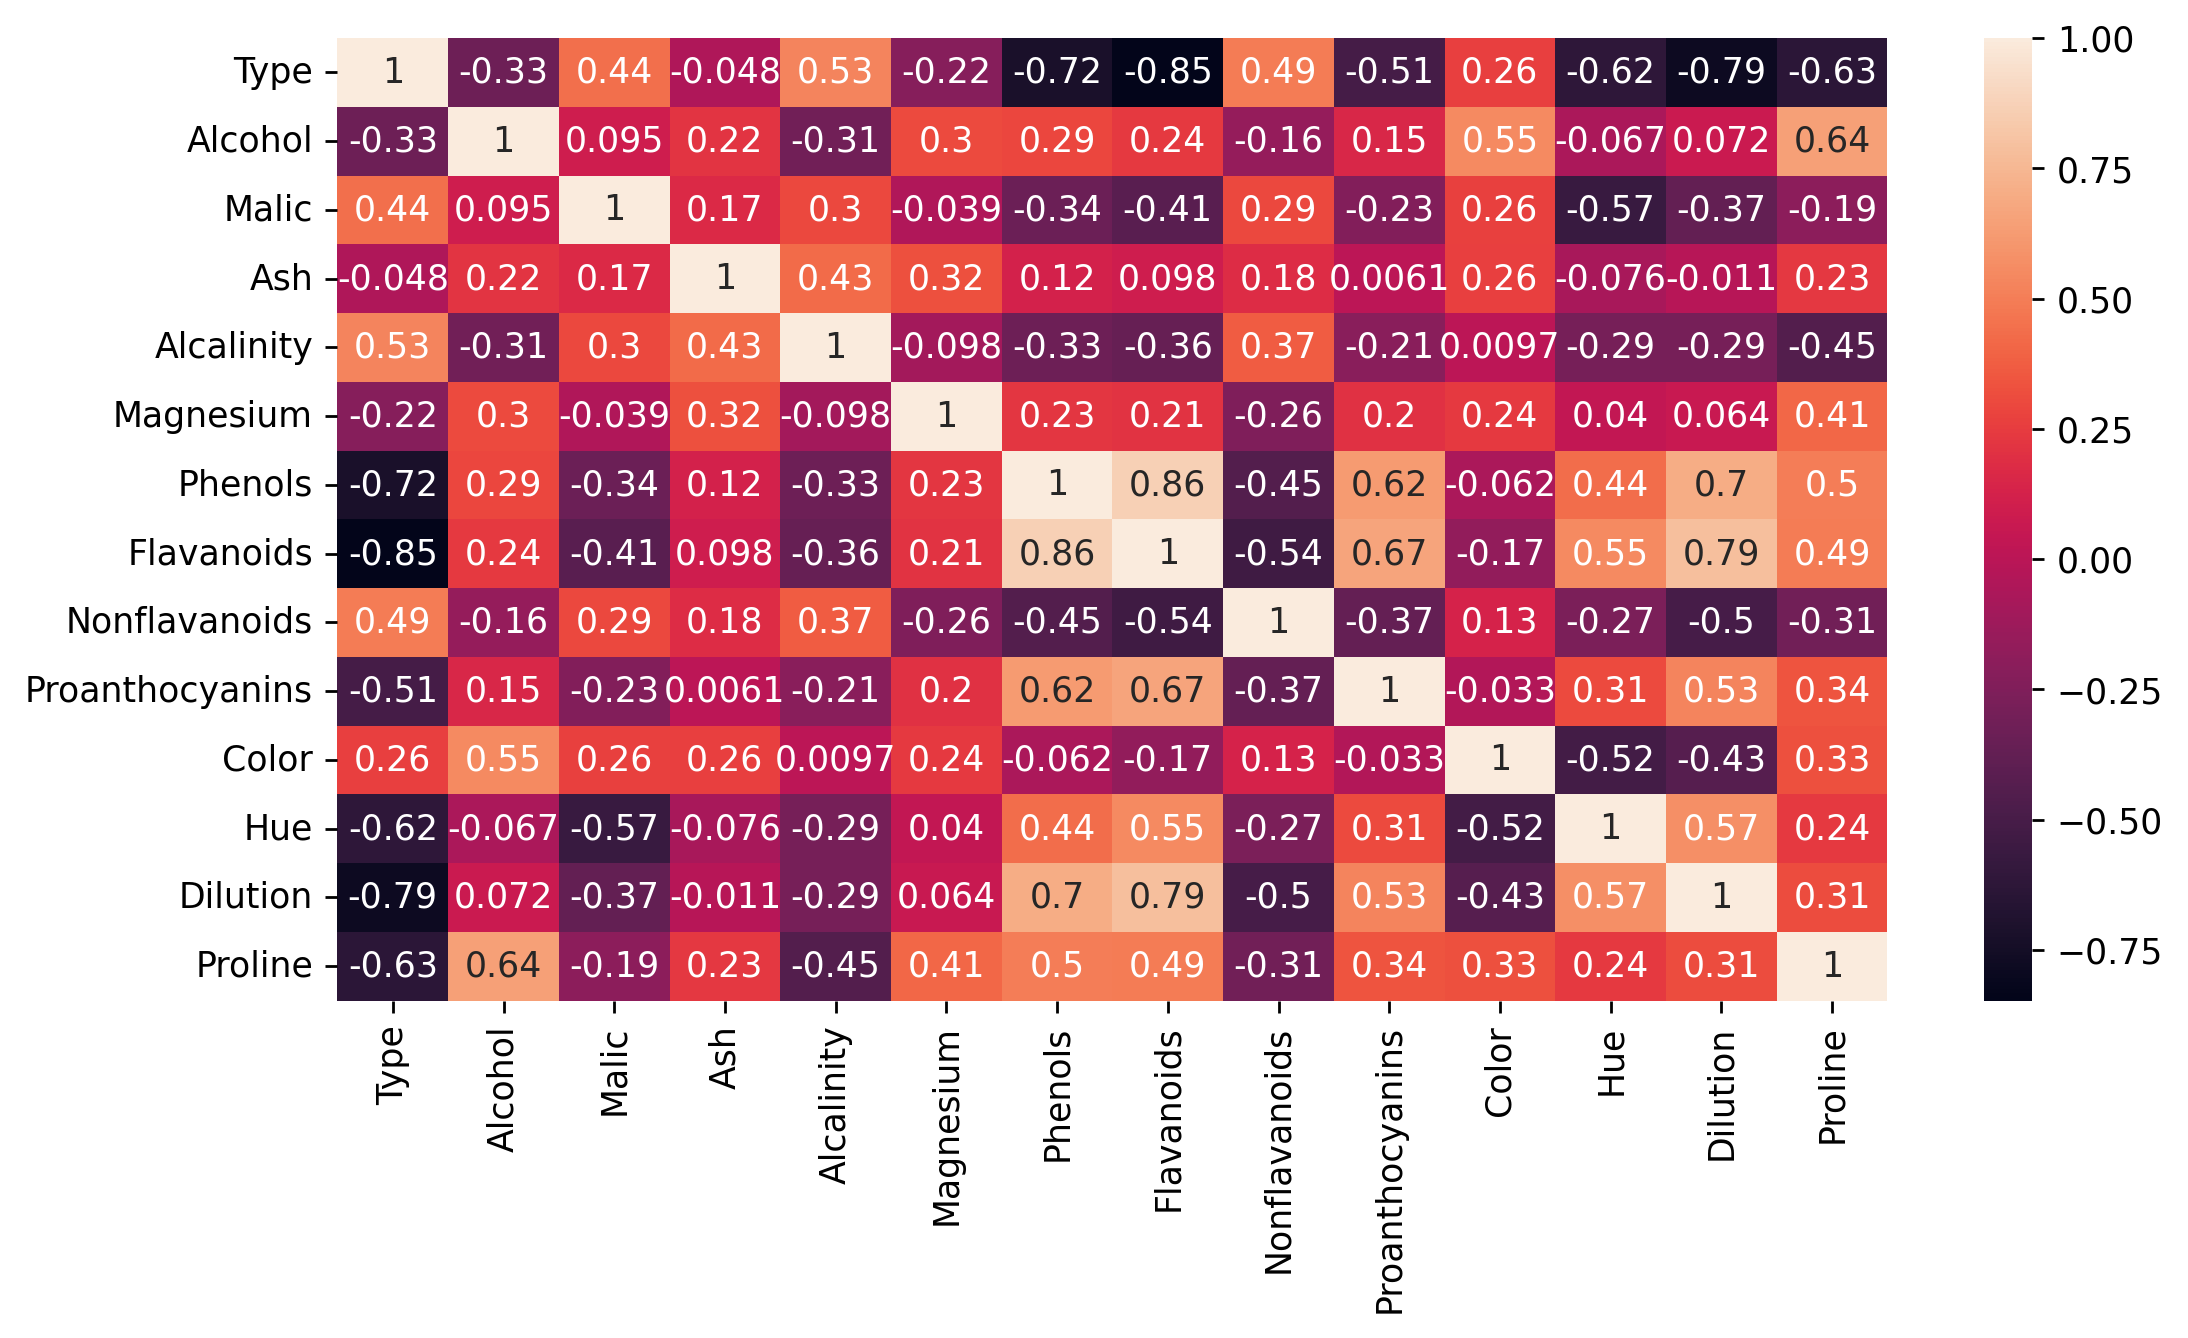

In [15]:
sns.heatmap(df.corr(),annot=True)

## Dimensionality Reduction with PCA

In [16]:
y = df['Type']       
x = df.drop('Type', axis=1) 


In [17]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [18]:
pca = PCA()
pcs = pca.fit_transform(x)

In [19]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187,-0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649,0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401,1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895,-0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559,-0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717,-0.130305,0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131,-0.565178,0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504,0.013484,-0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131,0.351025,-0.086492,-0.495366,0.353956,0.346681,-0.083471


In [20]:
pca.explained_variance_ratio_

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

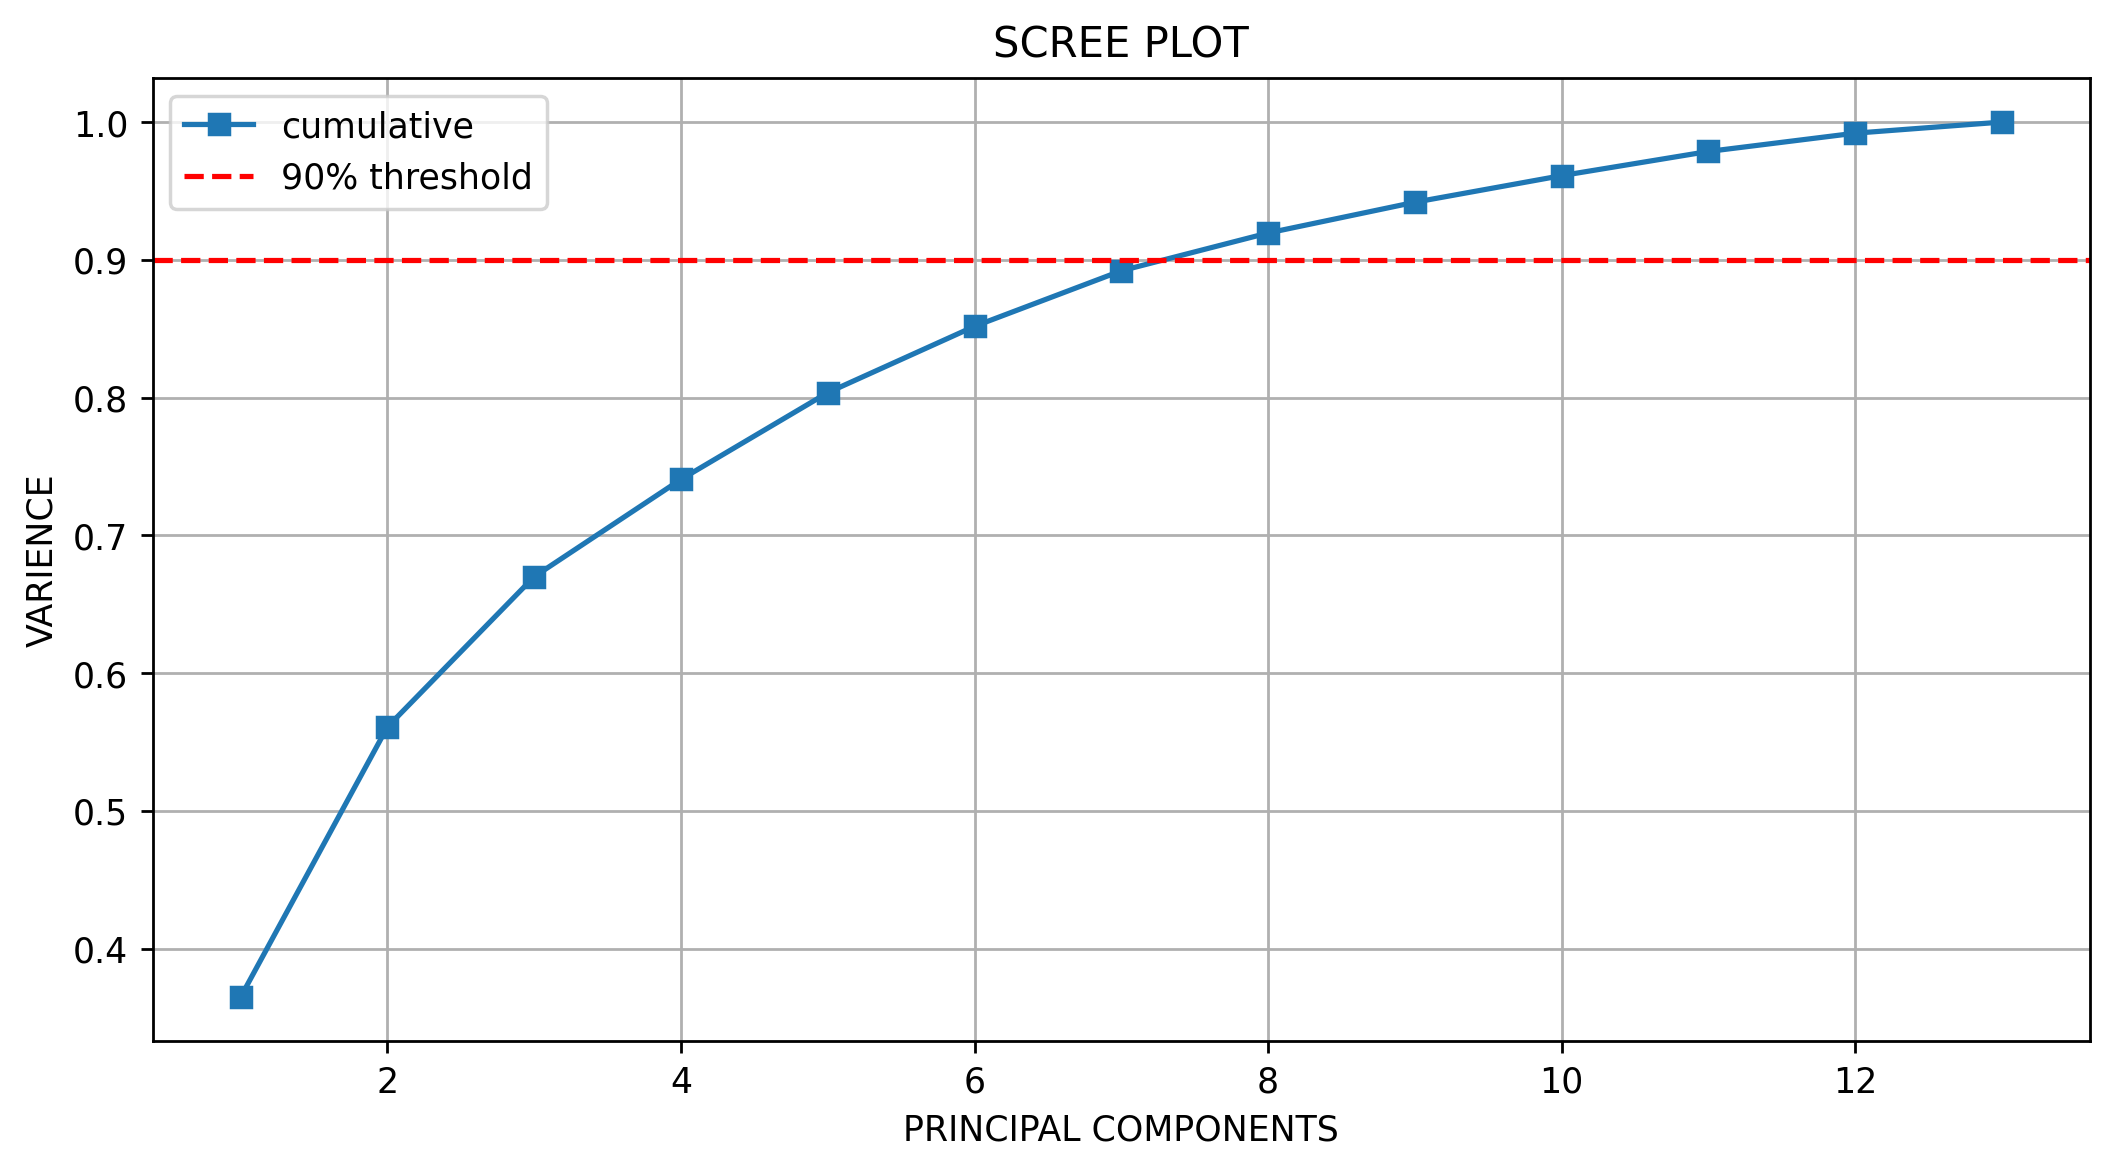

In [22]:
plt.plot(range(1,len(cumsum)+1),cumsum,marker='s',label='cumulative')
plt.axhline(y = 0.90,linestyle='--',color='red',label ='90% threshold')
plt.grid(True)
plt.xlabel("PRINCIPAL COMPONENTS")
plt.ylabel("VARIENCE")
plt.title("SCREE PLOT")
plt.legend()

# With PC = 8

In [23]:
pca = PCA(n_components=7)
pcs = pca.fit_transform(x)
pcs

array([[ 3.35814747,  1.52022185, -0.12637492, ...,  0.71089096,
         0.17664455,  0.70115415],
       [ 2.22921481, -0.33326137, -2.04283756, ..., -0.10744766,
         0.98490211,  0.04800137],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.36311262,
        -0.53766636,  0.41269113],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ...,  1.18509754,
        -0.3541478 ,  0.85350446],
       [-2.37160346,  2.39380794, -0.56148477, ...,  0.65865135,
        -1.25232522,  0.81313133],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.99799937,
        -0.23182472, -0.13011951]])

In [24]:
data = pd.DataFrame(pcs,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160
...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131


## Clustering with Original Data

In [25]:
n_clusters = len(y.unique())

kmeans_original = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels_original = kmeans_original.fit_predict(x)
sil_original = silhouette_score(x, labels_original)
db_original = davies_bouldin_score(x,labels_original)
print(f"Silhouette Score (Original): {sil_original:.4f}")
print(f"davies_bouldin_score : {db_original:.4f}")

Silhouette Score (Original): 0.2855
davies_bouldin_score : 1.3816


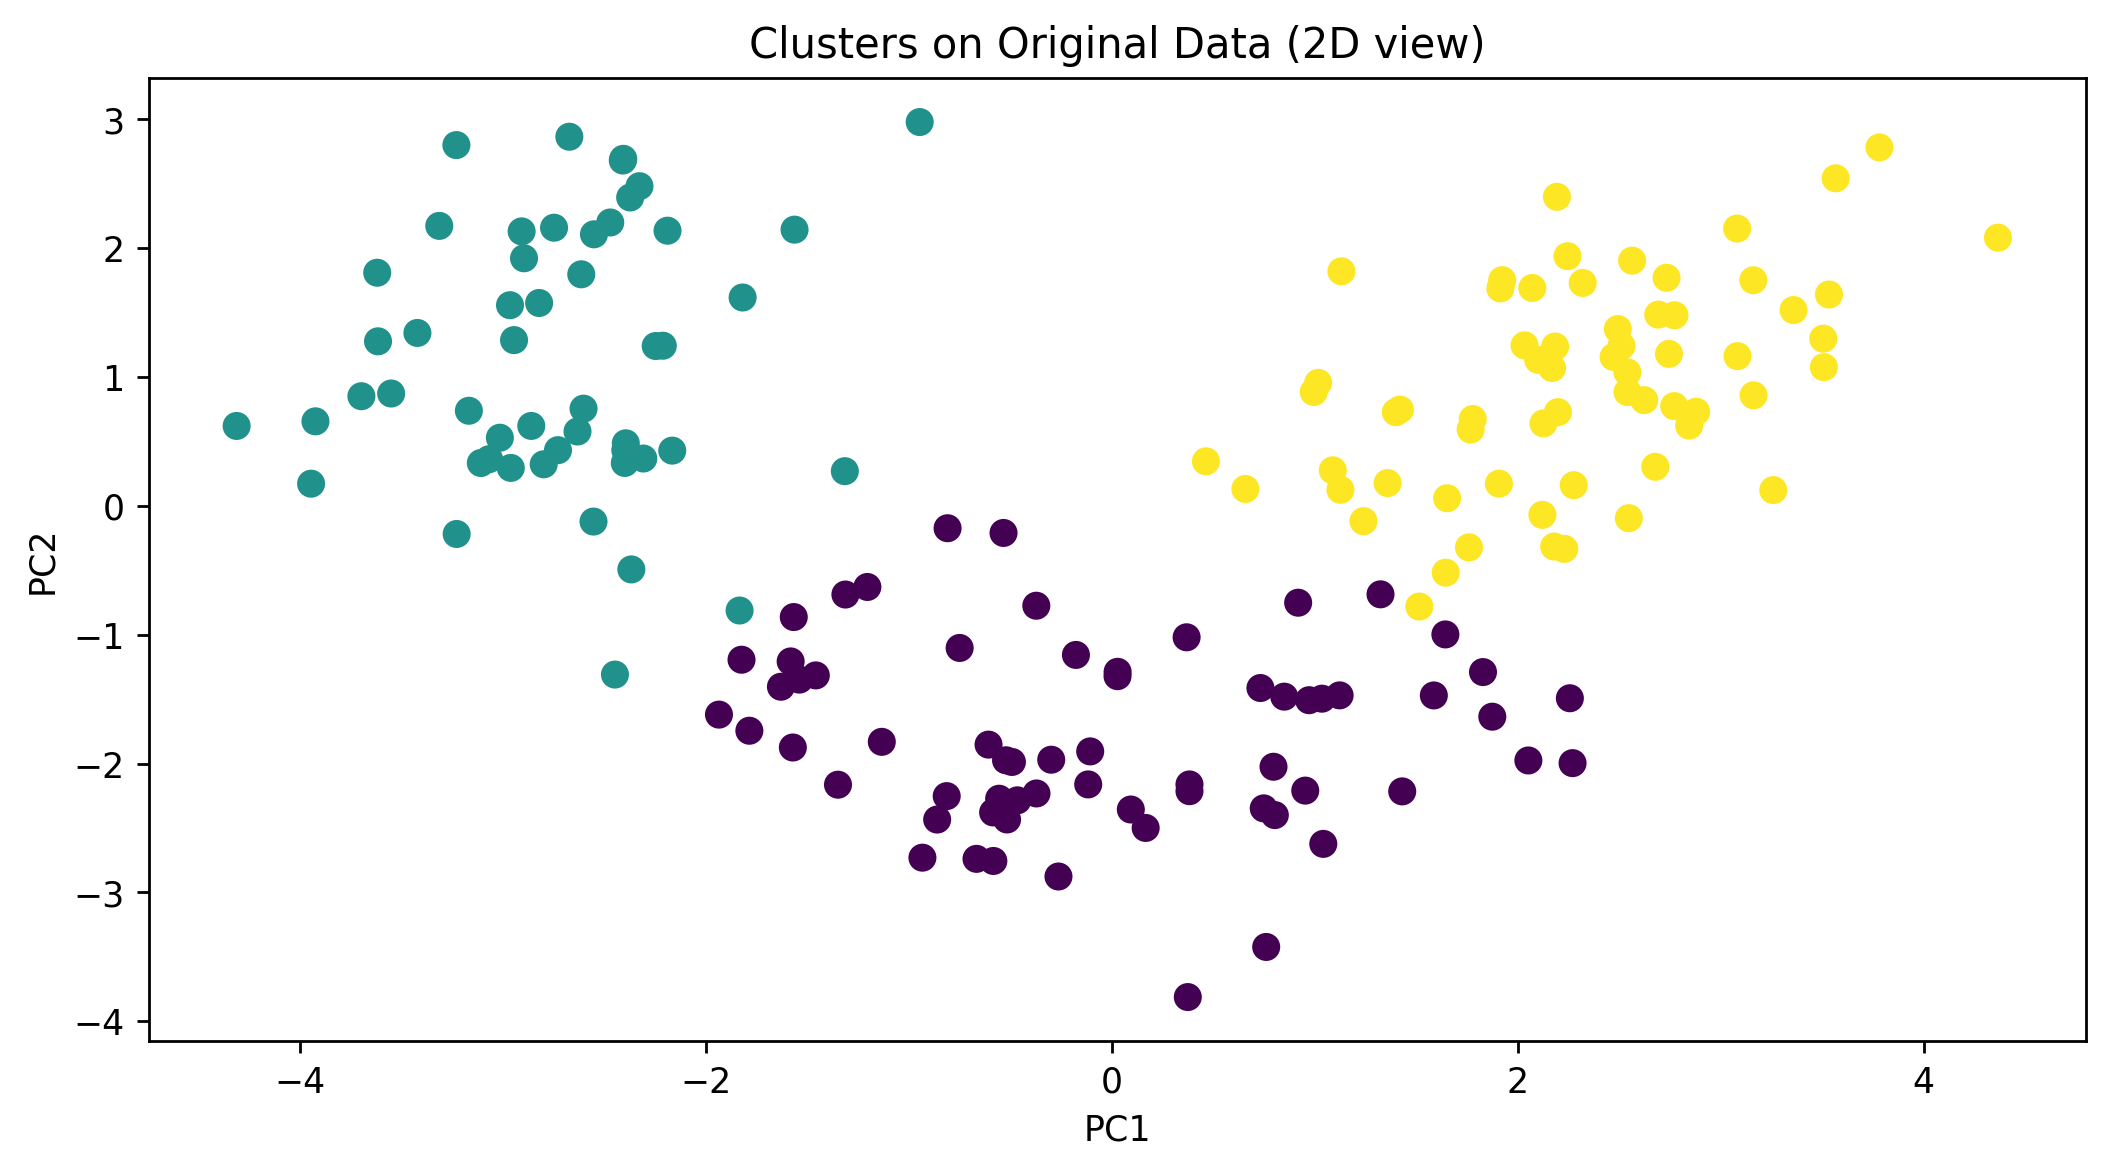

In [26]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(x)
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels_original, cmap='viridis', s=50)
plt.title("Clusters on Original Data (2D view)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Clustering with PCA Data

In [27]:
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(pcs)
sil_pca = silhouette_score(pcs, labels_pca)
db_pca = davies_bouldin_score(pcs,labels_pca)
print(f"Silhouette Score (PCA): {sil_pca:.4f}")
print(f"davies_bouldin_score:{db_pca:.4f}")

Silhouette Score (PCA): 0.3279
davies_bouldin_score:1.2145


Text(0, 0.5, 'PC2')

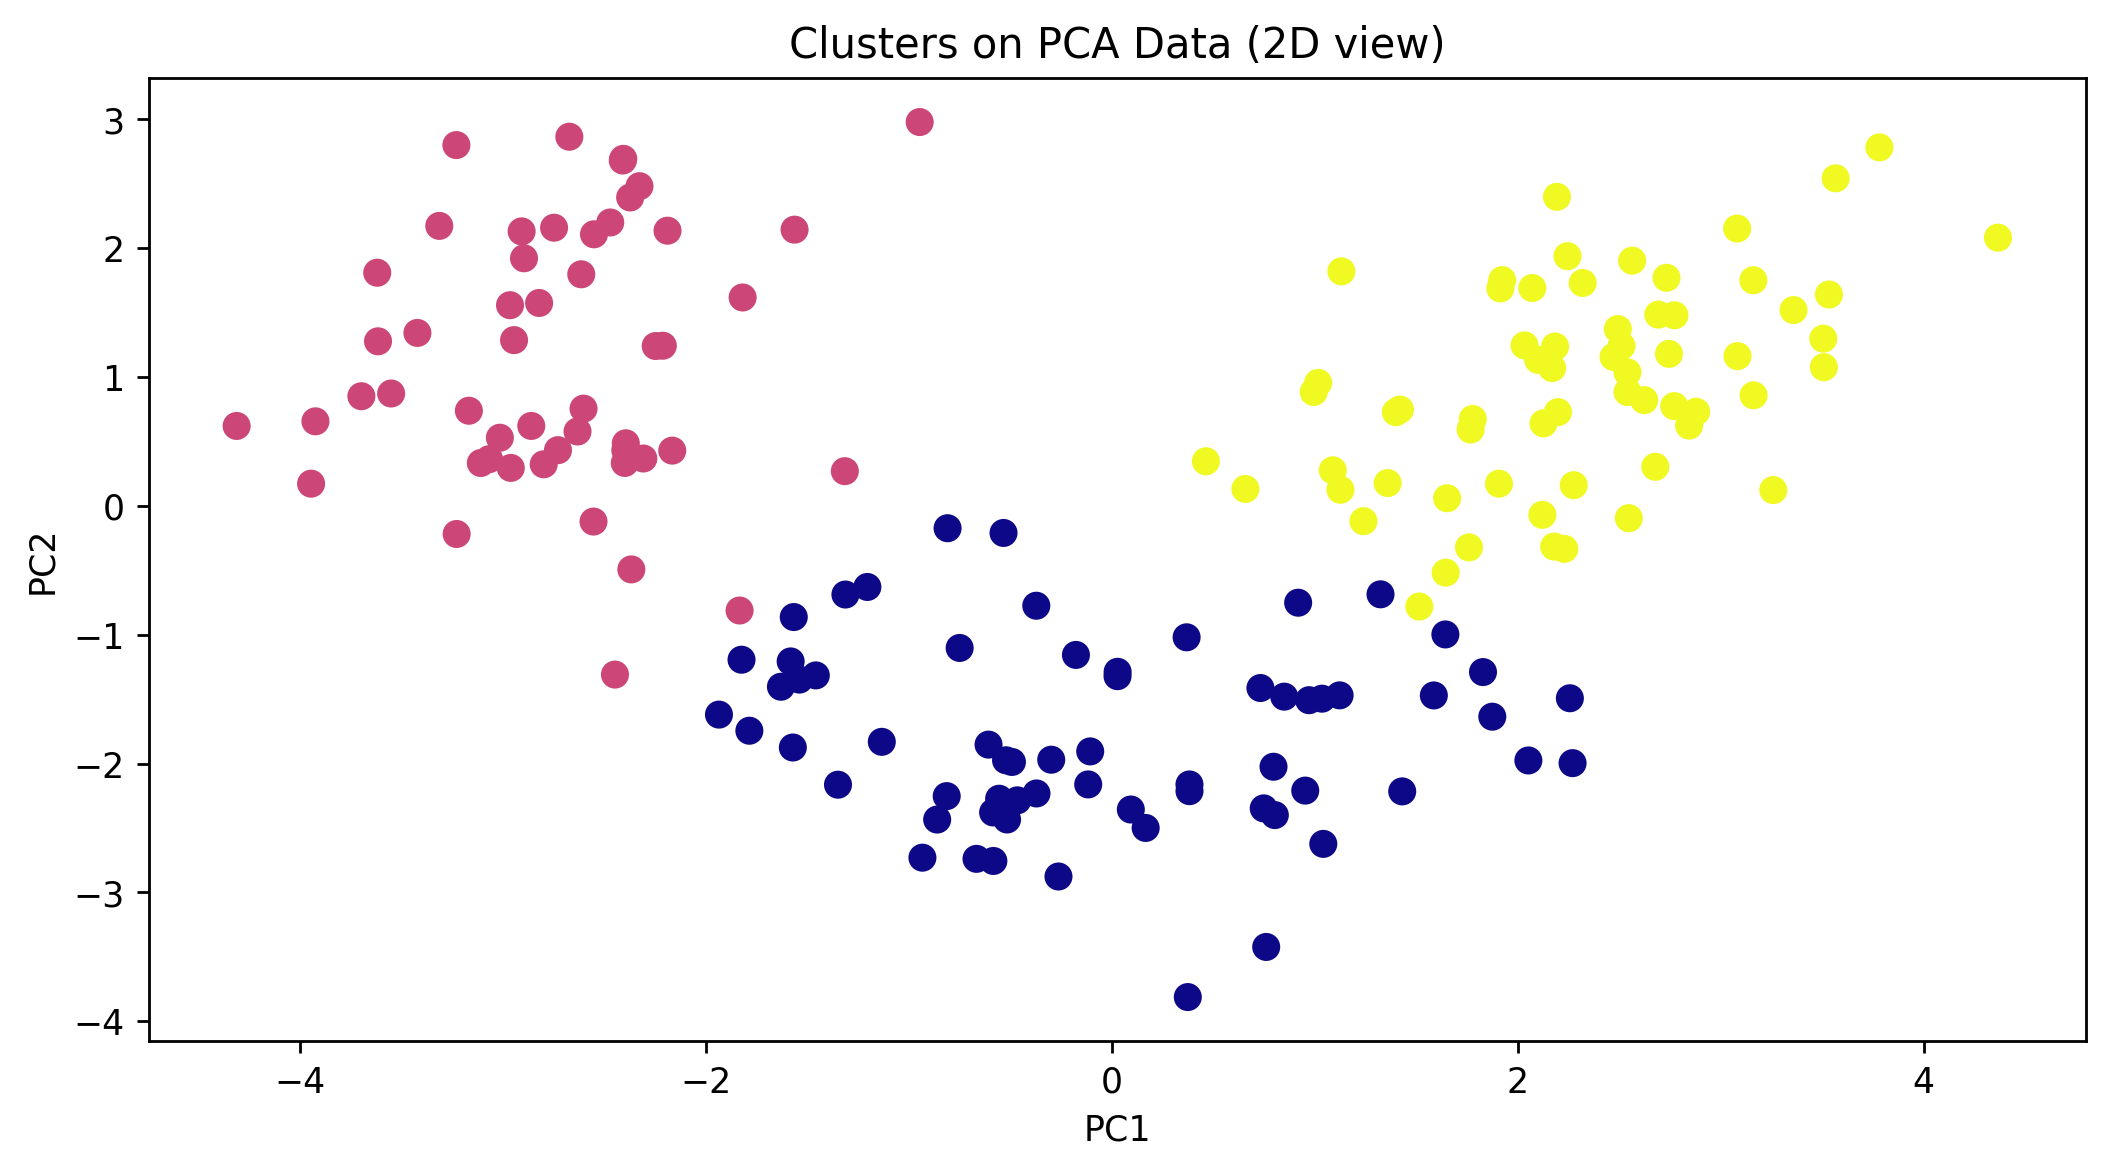

In [28]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(pcs)

plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=labels_pca, cmap='plasma', s=50)
plt.title("Clusters on PCA Data (2D view)")
plt.xlabel("PC1")
plt.ylabel("PC2")


## Comparison and Analysis


In [29]:
comparison_df = pd.DataFrame(
    {
        'Dataset':['original','with pca (8 components)'],
        'Silhoutte score':[sil_original,sil_pca],
        'Davies-Bouldin Index' : [db_original,db_pca],
        'ARI vs True Labels ': [adjusted_rand_score(y,labels_original),adjusted_rand_score(y,labels_pca)],
        'NMI vs True Labels': [
        normalized_mutual_info_score(y, labels_original),
        normalized_mutual_info_score(y, labels_pca)
    ]
    }
)

In [30]:
comparison_df

,Dataset,Silhoutte score,Davies-Bouldin Index,ARI vs True Labels,NMI vs True Labels
0,original,0.285463,1.381606,0.897495,0.875894
1,with pca (8 components),0.327871,1.214488,0.897495,0.875894


 The silhouette score increased from 0.285463 to 0.327871 after applying PCA, which means the cluster cohesion and separation slightly improved.

The Davies–Bouldin index decreased from 1.381 to 1.214, which indicates that the clusters are now more compact and well-separated after PCA.

The ARI (Adjusted Rand Index) and NMI (Normalized Mutual Information) scores are the same (0.897 and 0.876), meaning the overall cluster assignment relative to the true class labels remained consistent.


Similarities and differences observed:

Similarities:
ARI and NMI stayed the same → PCA didn’t change the overall grouping of samples in terms of class labels.

Differences:
PCA reduced dimensionality while slightly improving clustering quality (as seen in silhouette and DB scores).

Clusters appear more well-formed in lower dimensions, which improves visual separability.